# Taking Snapshots and plotting the Histogram

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t

# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t

# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)
    

In [7]:
L = 1. ## Box edge length
Natoms = 16 # Number of disks
density = 0.5 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.


## Positions and velocities of disks.

pos_initial = np.empty(shape=(Natoms,2),dtype = 'object')
k=0
for j in range(1,5):
  for i in range(1,5):
    pos_initial[k]=((L/5)*i,(L/5)*j)
    k+=1

l = len(pos_initial)
vel_initial = np.empty(shape=(l,2),dtype = 'object')
V = []
v = 50
for i in range(0,l):
    theta = np.random.uniform(0,2*np.pi)
    x = v*np.cos(theta)
    y = v*np.sin(theta)
    vel_initial[i] =x,y
    V.append((x**2 + y**2)**0.5)

# print('Total velocities:', V)
#################################################################################

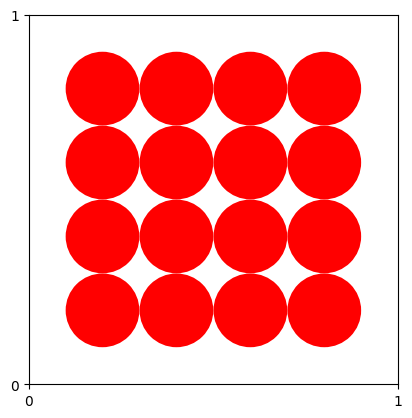

In [8]:
positions=np.empty(shape=(Natoms,2), dtype='object')
velocities=np.empty(shape=(Natoms,2), dtype='object')
for i in range(Natoms):
    for j in range(2):
        a = pos_initial[i][j] 
        positions[i][j] = a
        b = vel_initial[i][j]
        velocities[i][j] = b

t = 0.0 # Initial time.
n_events = 1500 # Number of collision events.
event_list = []
# energy_list = []

create_picture(positions)

In [9]:
## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)]
# print("pairs:",pairs)
print("No. of pairs: ", len(pairs))

No. of pairs:  120


total time for 1500 events=  0.09207807798057309
dt(time step for snapshot)=  6.138538532038206e-05


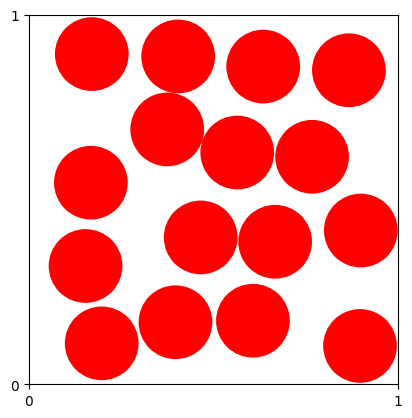

In [10]:
############### Event Loop ##############################################

for event in range(n_events):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)    
    t += next_event
    event_list.append(t)
    
#     E = 0
    
    for i in range(Natoms):
        positions[i] += velocities[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
        
#     for j in range(Natoms):
#         E += 0.5*(velocities[j][0]**2 + velocities[j][1]**2)
#     energy_list.append(E)

# print(E)
# plt.plot(event_list,energy_list)
# plt.xlabel("time")
# plt.ylabel("Total energy of the system")
# plt.show()


print("total time for",n_events,"events= ",t)
dt=t/n_events              #step for dividing the total time in equal intervals
print("dt(time step for snapshot)= ",dt)


t_list = []
i = dt
while i<=t:
    t_list.append(i)
    i += dt
# print("t_list =",t_list)
    
# print('final velocities after 100 events = ',velocities)
# print('final positions after 100 events = ',positions)
create_picture(positions)


##################################################################################

In [11]:
########## Taking SNAPSHOT : collecting all the velocities at different time steps#######
t=0
t1=0
n=0
n_steps=1500

vel_list=[vel_initial]
pos_list=[pos_initial]
#print(positions)
#print(velocities)
#calculating first event
for event in range(n_steps):
  wall_times = [wall_time(pos_initial[i][j], vel_initial[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
  pair_times = [pair_time(pos_initial[i], vel_initial[i], pos_initial[j], vel_initial[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
  next_event = min(wall_times + pair_times)  
  next_event=float(next_event)
  #print(next_event)

  t+=next_event
  
  if n<len(t_list):
    #print(n)
    if t>t_list[n]:
      b=t_list[n]-t1
      new_pos=pos_initial+vel_initial*b
      velo=vel_initial.copy()
      vel_list.append(velo)
      pos_list.append(new_pos)
      n+=1
    
  t1+=next_event

  for i in range(Natoms):
        pos_initial[i] += vel_initial[i]*next_event # Evolve positions to collision event
  if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        vel_initial[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
  else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = pos_initial[particle_2] - pos_initial[particle_1]
        rel_vel = vel_initial[particle_2] - vel_initial[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        vel_initial[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        vel_initial[particle_2] -= scal_prod*unit_perp


  #print(next_event)
  
print(len(vel_list))
#print((vel_list[0][0][1]))
#print(positions)
#print(pos_list)


1442


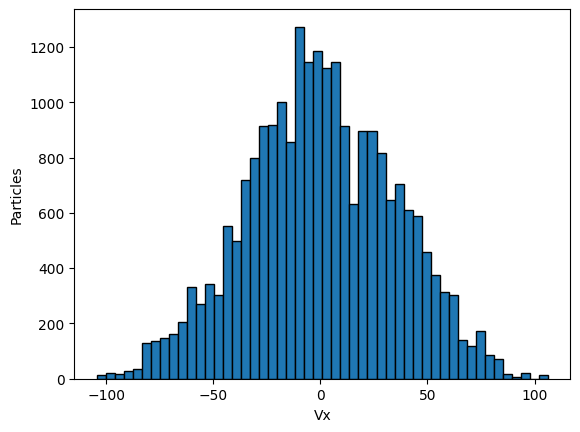

In [12]:
#####  Plotting Vx only ####
V1=[]

for i in range(len(vel_list)):
  for j in range(Natoms):
    for k in range(1):
      V1.append(vel_list[i][j][k])
#print(V)
plt.hist(V1,bins=50, histtype='bar', ec='black')
 

# Adding extra features   
plt.xlabel("Vx")
plt.ylabel("Particles")

plt.show()

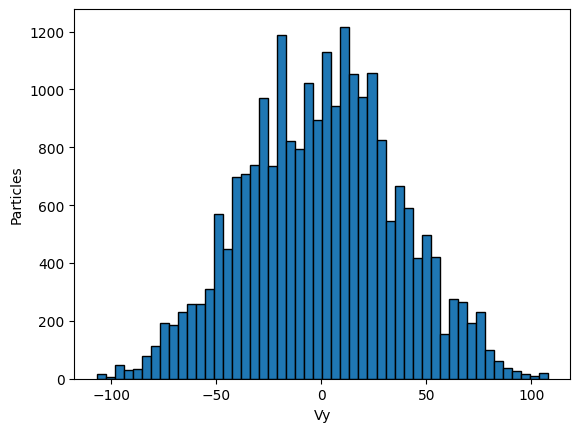

In [13]:
#####  Plotting Vy only ####
Vy=[]

for i in range(len(vel_list)):
  for j in range(Natoms):
    Vy.append(vel_list[i][j][1])
#print(V)
plt.hist(Vy,bins=50, histtype='bar', ec='black')
 

# Adding extra features   
plt.xlabel("Vy")
plt.ylabel("Particles")

plt.show()

(array([ 58., 157.,  31., 169., 173., 151., 287., 190., 317., 354., 126.,
        400., 361., 369., 308., 489., 617., 414., 384., 438., 498., 560.,
        477., 594., 594., 357., 481., 554., 655., 522., 756., 432., 320.,
        448., 369., 493., 409., 351., 662., 434., 318., 342., 316., 250.,
        302., 274., 307., 381., 272., 294., 256., 355., 372., 207., 226.,
        195., 335., 332., 231., 200., 137., 270., 250.,  80., 132., 161.,
         37.,  29.,  69.,  65.,  45.,  28.,  44.,  49.,   0.,  34.,  20.,
         24.,  24.,  21.,  16.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         10.,   2.]),
 array([  1.52824566,   2.84841952,   4.16859338,   5.48876723,
          6.80894109,   8.12911495,   9.44928881,  10.76946267,
         12.08963653,  13.40981039,  14.72998425,  16.05015811,
         17.37033197,  18.69050583,  20.01067969,  21.33085355,
         22.65102741,  23.97120127,  25.29137513,  26.61154899,
         27.93172285,  29.25189671,  30.57207056,  31.89224442,
  

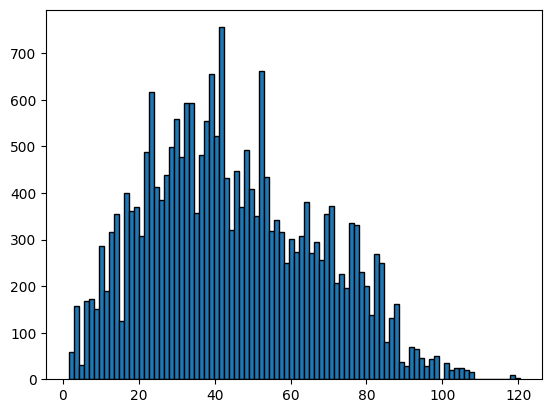

In [14]:
##############Plotting total V###
V_tot=[]

for i in range(len(vel_list)):
  for j in range(Natoms):
    for k in range(1):
      V_tot.append(((vel_list[i][j][k])**2 +(vel_list[i][j][k+1])**2)**(1/2))   # here i didn't use Vx**2+Vy**2 as sqaring them turned all the -ve velocities into positive 
      
plt.hist(V_tot,bins=90,histtype='bar', ec='black')